# 📊 Unlocking Insights Through Visualization
#### Professional Data Science Talk
*Your Name – 2025*

In [33]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True
            
        }
    )

In [2]:
import plotly.figure_factory as ff
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from perlin_noise import PerlinNoise
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


C:\Users\M738081\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Part 1: Some Data is Meant to be Seen

## The Path to Insight

### Setup

In [3]:

# Define grid size
size = 50

# Initialize Perlin Noise
noise = PerlinNoise(octaves=4, seed=42)

# Generate elevation data using Perlin noise
elevation = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        elevation[i, j] = noise([i / size, j / size])

# Normalize elevation values to range 0-100
elevation = (elevation - np.min(elevation)) / (np.max(elevation) - np.min(elevation)) * 100

# Convert to Pandas DataFrame for display
df = pd.DataFrame(elevation.round(1))

### Display Raw Data

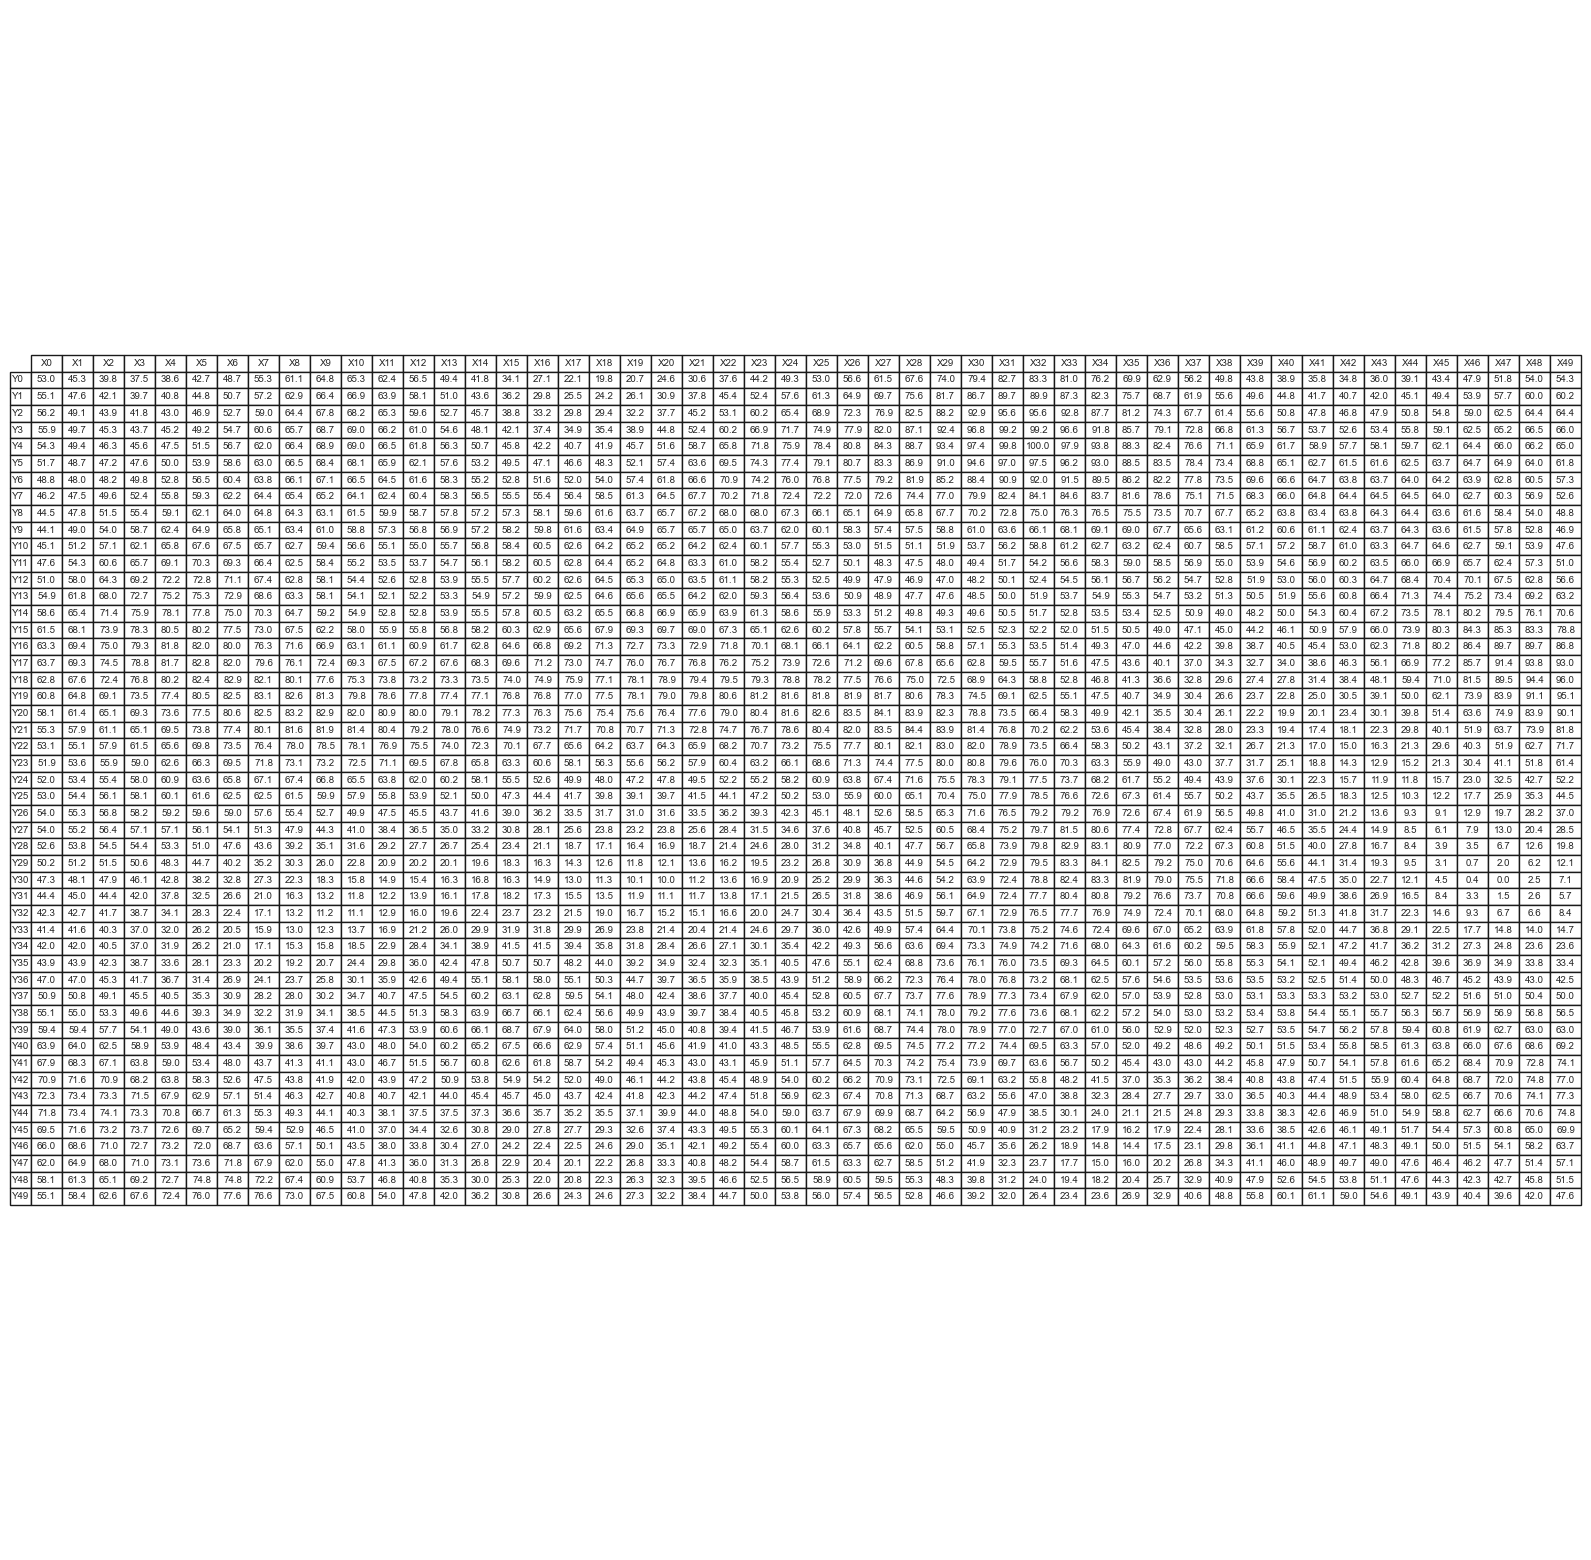

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.axis("tight")
ax.axis("off")

table = ax.table(cellText=df.values, 
                 colLabels=[f"X{i}" for i in range(size)], 
                 rowLabels=[f"Y{i}" for i in range(size)], 
                 cellLoc="center", 
                 loc="center")

# Adjust table font size for readability
table.auto_set_font_size(True)
table.set_fontsize(9)
plt.show()


### Step 1

In [45]:
size = elevation.shape[0]

# Create the heat map in plotly
fig = go.Figure(data=go.Heatmap(
    z=elevation,      # Elevation values
    x=np.linspace(0, size-1, size),  # X coordinates (0 to size-1)
    y=np.linspace(0, size-1, size),  # Y coordinates (0 to size-1)
    colorscale='greys'  # Use the 'viridis' color scale
))
# Update the layout with titles and labels
fig.update_layout(
    title="Shaded Elevation",
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    coloraxis_colorbar=dict(
        title="Elevation"  # Color bar label
    ),
    width=900,
    height=720
)

# Show the plot
fig.show()

### Now I see it

In [44]:

# Create the contour plot in plotly
fig = go.Figure(data=go.Contour(
    z=elevation,      # Elevation values
    x=np.linspace(0, size-1, size),  # X coordinates (0 to size-1)
    y=np.linspace(0, size-1, size),  # Y coordinates (0 to size-1)
    colorscale='haline',  # Use the 'terrain' color scale
    contours=dict(
        start=elevation.min(),  # Set the starting level for contours
        end=elevation.max(),    # Set the ending level for contours
        size=(elevation.max() - elevation.min()) / 25  # Set the contour level spacing
    )
))

# Update the layout with titles and labels
fig.update_layout(
    title="Countoured Elevation",
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    coloraxis_colorbar=dict(
        title="Elevation"  # Color bar label
    ),
    width=900,
    height=720
)

# Show the plot
fig.show()

### Man vs Machine

In [8]:
import heapq
import numpy as np
import plotly.graph_objects as go

# Define grid size and Perlin noise elevation data
size = 50
noise = PerlinNoise(octaves=4, seed=42)
elevation = np.zeros((size, size))

for i in range(size):
    for j in range(size):
        elevation[i, j] = noise([i / size, j / size])

elevation = (elevation - np.min(elevation)) / (np.max(elevation) - np.min(elevation)) * 100

# Define start and end points
start_x, start_y = 10, 0
end_x, end_y = 25, size - 1  # y=49 if size=50

# Heuristic function: Manhattan distance
def heuristic(x, y):
    return abs(x - end_x) + abs(y - end_y)

# A* algorithm
def a_star_search(start_x, start_y):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start_x, start_y), start_x, start_y))  # (f_cost, x, y)
    
    came_from = {}
    g_costs = { (start_x, start_y): 0 }
    f_costs = { (start_x, start_y): heuristic(start_x, start_y) }

    path_x, path_y = [], []
    
    while open_set:
        _, current_x, current_y = heapq.heappop(open_set)

        # If we reached the destination, reconstruct the path
        if (current_x, current_y) == (end_x, end_y):
            while (current_x, current_y) in came_from:
                path_x.append(current_x)
                path_y.append(current_y)
                current_x, current_y = came_from[(current_x, current_y)]
            path_x.append(start_x)
            path_y.append(start_y)
            return path_x[::-1], path_y[::-1]  # Reverse path for correct order

        # Check all possible neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]:
            neighbor_x, neighbor_y = current_x + dx, current_y + dy
            if 0 <= neighbor_x < size and 0 <= neighbor_y < size:
                tentative_g_cost = g_costs[(current_x, current_y)] + elevation[neighbor_y, neighbor_x]

                if (neighbor_x, neighbor_y) not in g_costs or tentative_g_cost < g_costs[(neighbor_x, neighbor_y)]:
                    came_from[(neighbor_x, neighbor_y)] = (current_x, current_y)
                    g_costs[(neighbor_x, neighbor_y)] = tentative_g_cost
                    f_costs[(neighbor_x, neighbor_y)] = tentative_g_cost + heuristic(neighbor_x, neighbor_y)
                    heapq.heappush(open_set, (f_costs[(neighbor_x, neighbor_y)], neighbor_x, neighbor_y))

    return [], []  # No path found (shouldn't happen with proper inputs)

# Get the path
path_x, path_y = a_star_search(start_x, start_y)

# Plot the contour map
fig = go.Figure()

# Add the contour plot (elevation map)
fig.add_trace(go.Contour(
    z=elevation,
    x=np.linspace(0, size - 1, size),
    y=np.linspace(0, size - 1, size),
    colorscale='haline',
    contours=dict(
        start=elevation.min(),
        end=elevation.max(),
        size=(elevation.max() - elevation.min()) / 25
    ),
    showscale=True,
    name='Elevation',
    visible=True  # <-- key: keep it always in the base layer
))

# Add visual cues for start and end points
fig.add_trace(go.Scatter(
    x=[start_x], y=[start_y],
    mode='markers',
    marker=dict(size=15, color='red', symbol='star'),
    name='Start Point'
))

fig.add_trace(go.Scatter(
    x=[end_x], y=[end_y],
    mode='markers',
    marker=dict(size=15, color='yellow', symbol='star'),
    name='End Point'
))

# Create animation for the pathfinding process
frames = []

# Add initial frame with only the start and end points visible
frames.append(go.Frame(
    data=[
        go.Scatter(x=[start_x], y=[start_y], mode='markers', marker=dict(size=15, color='red', symbol='star')),
        go.Scatter(x=[end_x], y=[end_y], mode='markers', marker=dict(size=15, color='yellow', symbol='star'))
    ],
    name='frame_0'
))

# Add frames to show each step of the pathfinding
for i in range(1, len(path_x) + 1):
    frames.append(go.Frame(
        data=[
            go.Contour(
                z=elevation,
                x=np.linspace(0, size-1, size),
                y=np.linspace(0, size-1, size),
                colorscale='haline',
                contours=dict(
                    start=elevation.min(),
                    end=elevation.max(),
                    size=(elevation.max() - elevation.min()) / 25
                ),
                showscale=True
            ),
            go.Scatter(
                x=path_x[:i], y=path_y[:i],
                mode='lines',
                line=dict(color='black', width=3),
                marker=dict(size=6, color='white'),
                name='Path (animated)'
            ),
            go.Scatter(
                x=[start_x], y=[start_y],
                mode='markers',
                marker=dict(size=15, color='red', symbol='star'),
                name='Start Point'
            ),
            go.Scatter(
                x=[end_x], y=[end_y],
                mode='markers',
                marker=dict(size=15, color='yellow', symbol='star'),
                name='End Point'
            )
        ],
        name=f'frame_{i}'
    ))

go.Contour(
    z=elevation,
    x=np.linspace(0, size-1, size),
    y=np.linspace(0, size-1, size),
    colorscale='haline',
    contours=dict(
        start=elevation.min(),
        end=elevation.max(),
        size=(elevation.max() - elevation.min()) / 25
    ))
# Set layout options
fig.update_layout(
    title="Topographic Map with Animated Path",
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    width=900,
    height=720,
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)]
        )]
    )],
    # Move the color bar to avoid overlap
    coloraxis_colorbar=dict(
        title="Elevation", 
        x=1.05,  # Position the color bar to the right
        tickvals=[0, 25, 50, 75, 100]
    ),
    # Adjust the layout so that legend items don't overlap
    legend=dict(x=0.7, y=1, traceorder='normal', font=dict(size=12))
)

# Add frames to the figure
fig.frames = frames

# Show the plot
fig.show()

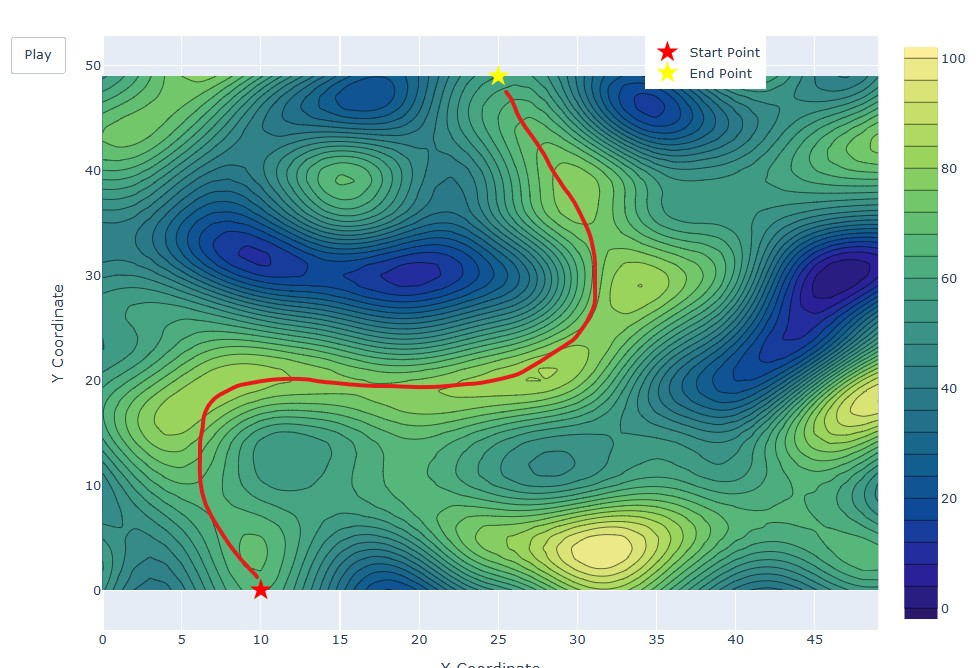

## Anscombe

### Setup

In [9]:
an = sns.load_dataset("anscombe")

In [10]:
# Create a dictionary of DataFrames for each dataset type
ans = {dataset: an[an['dataset'] == dataset].reset_index(drop=True).drop(columns=['dataset']) for dataset in an['dataset'].unique()}

# Concatenate the DataFrames along the columns
result = pd.concat(ans, axis=1)

# Flatten the MultiIndex columns
result.columns = [f'{col}' for col in result.columns]

In [11]:
def regression_formula(df):
    X = sm.add_constant(df['x'])
    model = sm.OLS(df['y'], X).fit()
    return model.params

In [12]:
regression_lines = an.groupby('dataset').apply(regression_formula).reset_index()
regression_lines.columns = ['dataset', 'intercept', 'slope']

C:\Users\M738081\AppData\Local\Temp\ipykernel_19060\2177288824.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [13]:
# Calculate measures of central tendency and regression line formula
summary_stats = an.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std']
}).reset_index()

summary_stats.columns = ['dataset', 'mean_x', 'std_x', 'mean_y', 'std_y']
summary_stats = summary_stats.merge(regression_lines, on='dataset')

summary_stats = summary_stats.round(2)

### Display the Raw Data

In [14]:
result

('I', 'x')  ('I', 'y')  ('II', 'x')  ('II', 'y')  ('III', 'x')  \
0         10.0        8.04         10.0         9.14          10.0   
1          8.0        6.95          8.0         8.14           8.0   
2         13.0        7.58         13.0         8.74          13.0   
3          9.0        8.81          9.0         8.77           9.0   
4         11.0        8.33         11.0         9.26          11.0   
5         14.0        9.96         14.0         8.10          14.0   
6          6.0        7.24          6.0         6.13           6.0   
7          4.0        4.26          4.0         3.10           4.0   
8         12.0       10.84         12.0         9.13          12.0   
9          7.0        4.82          7.0         7.26           7.0   
10         5.0        5.68          5.0         4.74           5.0   

    ('III', 'y')  ('IV', 'x')  ('IV', 'y')  
0           7.46          8.0         6.58  
1           6.77          8.0         5.76  
2          12.74          8.0         7.71  
3           7.11          8.0         8.84  
4           7.81          8.0         8.47  
5           8.84          8.0         7.04  
6           6.08          8.0         5.25  
7           5.39         19.0        12.50  
8           8.15          8.0         5.56  
9           6.42          8.0         7.91  
10          5.73          8.0         6.89

### Show Summary Stats

In [15]:
summary_stats.style.set_caption("Summary Statistics and Regression Line Coefficients by Dataset") \
    .set_table_attributes('style="width:100%; font-size:16px"') \
    .format(precision=2) \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('caption-side', 'top'),
                  ('font-size', '18px'),
                  ('font-weight', 'bold')]
    }]) \
    .background_gradient(subset=['mean_x', 'mean_y'], cmap='Blues') \
    .background_gradient(subset=['std_x', 'std_y'], cmap='Oranges') \
    .background_gradient(subset=['slope', 'intercept'], cmap='Greens')

### Expose the True Shape

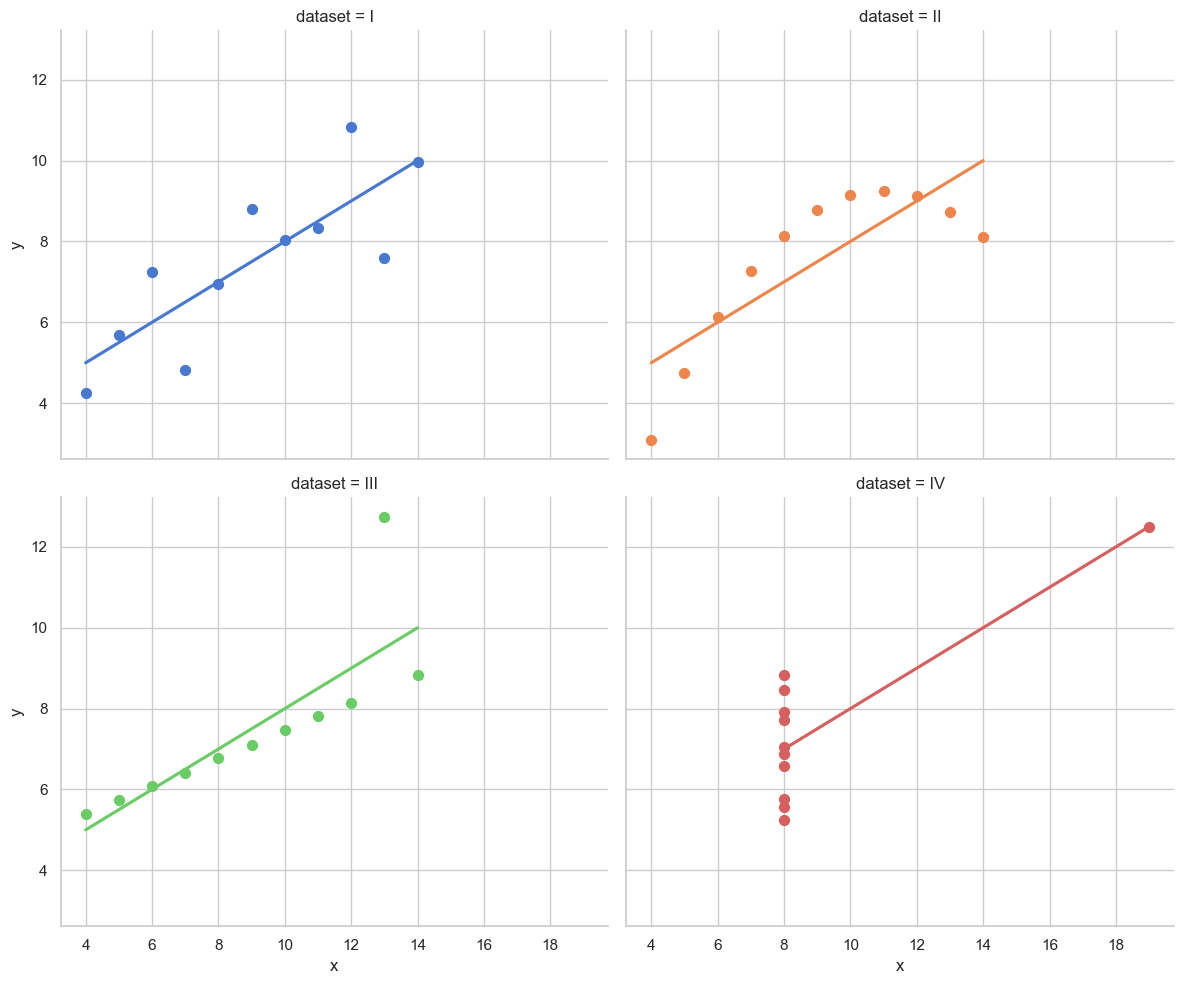

In [16]:
sns.set(style="whitegrid")

g = sns.lmplot(
    x="x", y="y", col="dataset", hue="dataset", data=an,
    col_wrap=2, ci=None, palette="muted",
    scatter_kws={"s": 50, "alpha": 1}, height=5, aspect=1.2
)

# Tidy up layout to match previous examples
plt.tight_layout()
plt.show()

# Part 2: Converting data to visual information

## The Canvas (Scaffolding)

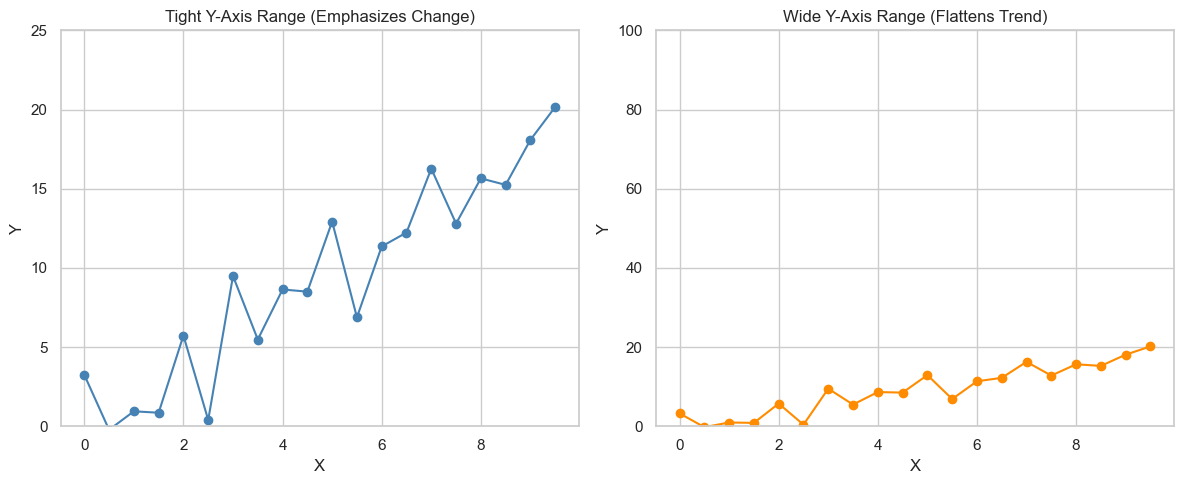

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a simple linear trend with some noise
np.random.seed(1)
x = np.arange(0, 10, 0.5)
y = 2 * x + np.random.normal(0, 2, size=len(x))

# Create subplots with different Y-axis ranges
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Tight y-axis range
axs[0].plot(x, y, marker='o', linestyle='-', color='steelblue')
axs[0].set_ylim(0, 25)
axs[0].set_title("Tight Y-Axis Range (Emphasizes Change)")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# Plot 2: Wide y-axis range
axs[1].plot(x, y, marker='o', linestyle='-', color='darkorange')
axs[1].set_ylim(0, 100)
axs[1].set_title("Wide Y-Axis Range (Flattens Trend)")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

plt.tight_layout()
plt.show()

## Data Transformations

### Example: Bin Sizes

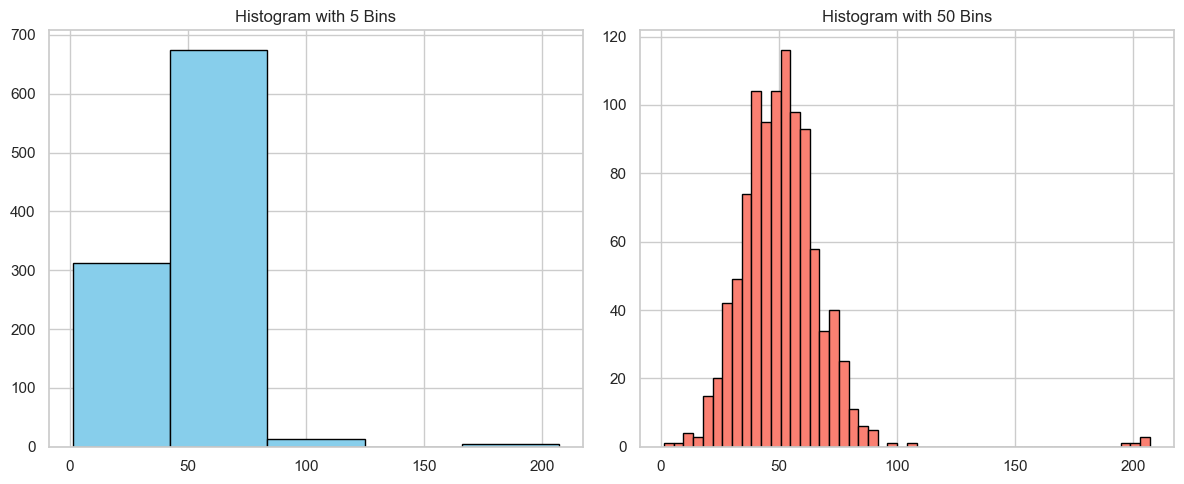

In [18]:
sns.set(style="whitegrid")

# Generate data with outliers
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=1000)
data_with_outliers = np.concatenate([data, np.random.normal(loc=200, scale=5, size=5)])

# Plot histograms with different bin sizes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(data_with_outliers, bins=5, color="skyblue", edgecolor="black")
axs[0].set_title("Histogram with 5 Bins")

axs[1].hist(data_with_outliers, bins=50, color="salmon", edgecolor="black")
axs[1].set_title("Histogram with 50 Bins")

plt.tight_layout()
plt.show()

### Example: Normalization

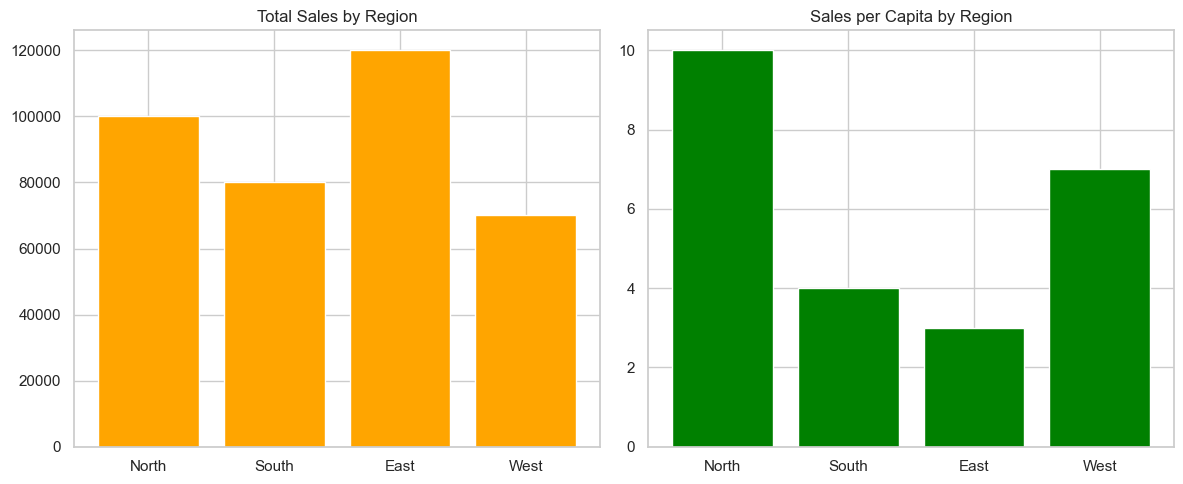

In [19]:
sns.set(style="whitegrid")

# Data for sales and population
regions = ['North', 'South', 'East', 'West']
sales = np.array([100000, 80000, 120000, 70000])
population = np.array([10000, 20000, 40000, 10000])
sales_per_capita = sales / population

# Plot bar charts
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(regions, sales, color="orange")
axs[0].set_title("Total Sales by Region")

axs[1].bar(regions, sales_per_capita, color="green")
axs[1].set_title("Sales per Capita by Region")

plt.tight_layout()
plt.show()

### Example: Log Transformation

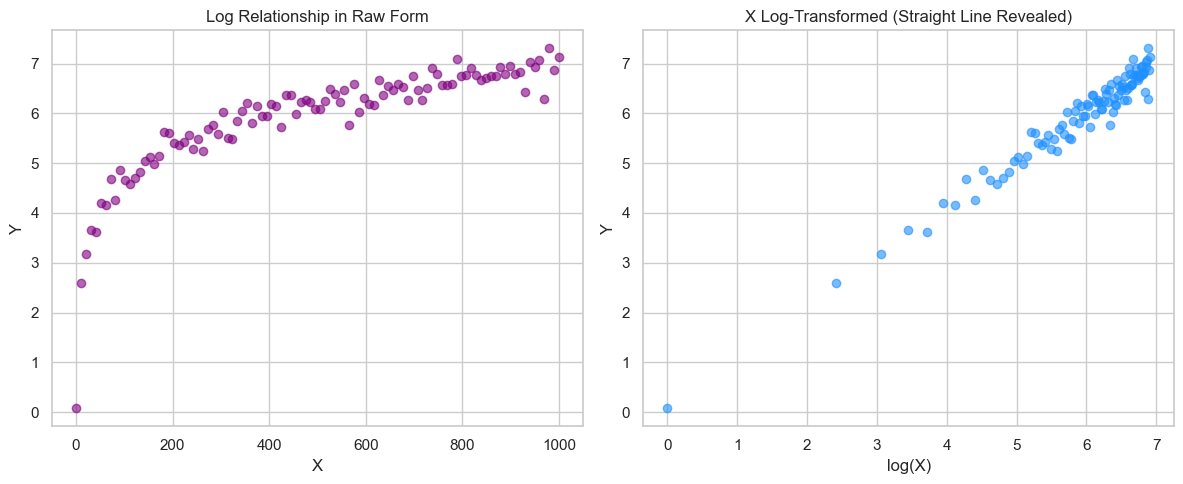

In [20]:
sns.set(style="whitegrid")

# Generate log-related data
x = np.linspace(1, 1000, 100)
y = np.log(x) + np.random.normal(0, 0.2, size=x.shape)

# Plot scatterplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(x, y, color="purple", alpha=0.6)
axs[0].set_title("Log Relationship in Raw Form")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

axs[1].scatter(np.log(x), y, color="dodgerblue", alpha=0.6)
axs[1].set_title("X Log-Transformed (Straight Line Revealed)")
axs[1].set_xlabel("log(X)")
axs[1].set_ylabel("Y")

plt.tight_layout()
plt.show()

## Marks

* **Points** for scatterplots, dot plots, geographic coordinates
* **Lines** for trends, time series, or continuous flow
* **Bars** for comparing quantities across categories
* **Areas** for showing accumulation or volume
* **Tiles, ribbons, rectangles** - for heatmaps, confidence intervals, density zones


## Encoding

### Position

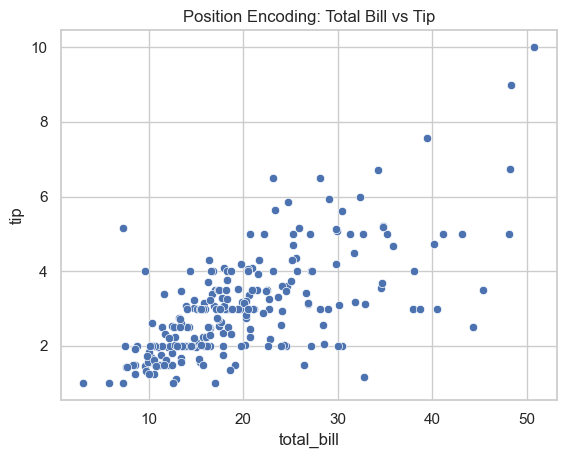

In [21]:
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Position Encoding: Total Bill vs Tip")
plt.show()

### Color

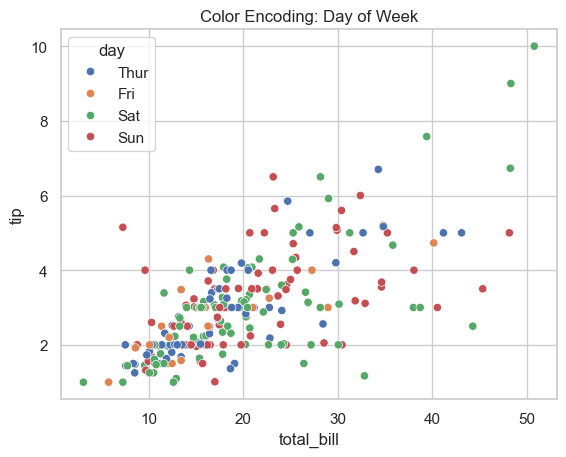

In [22]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")
plt.title("Color Encoding: Day of Week")
plt.show()

### Shape

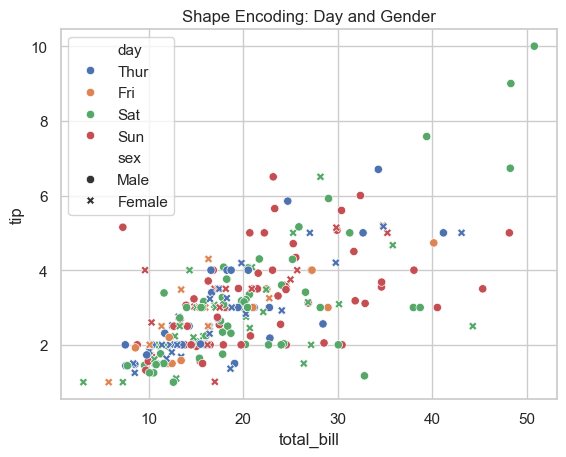

In [23]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="sex")
plt.title("Shape Encoding: Day and Gender")
plt.show()

### Size

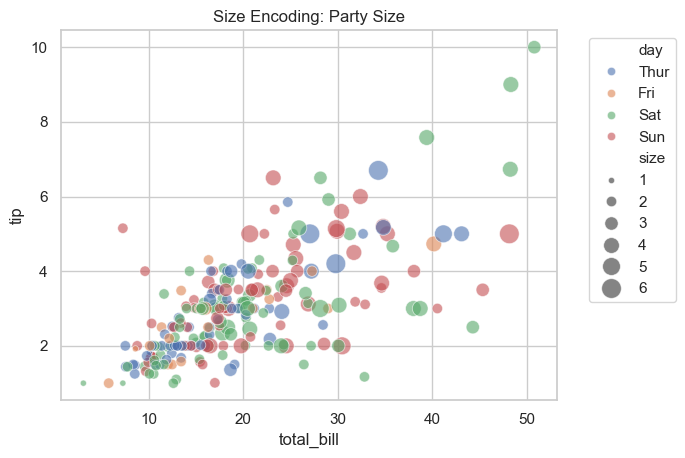

In [24]:
sns.scatterplot(data=tips, x="total_bill", y="tip", size="size", hue="day", sizes=(20, 200), alpha=0.6)
plt.title("Size Encoding: Party Size")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### Facets

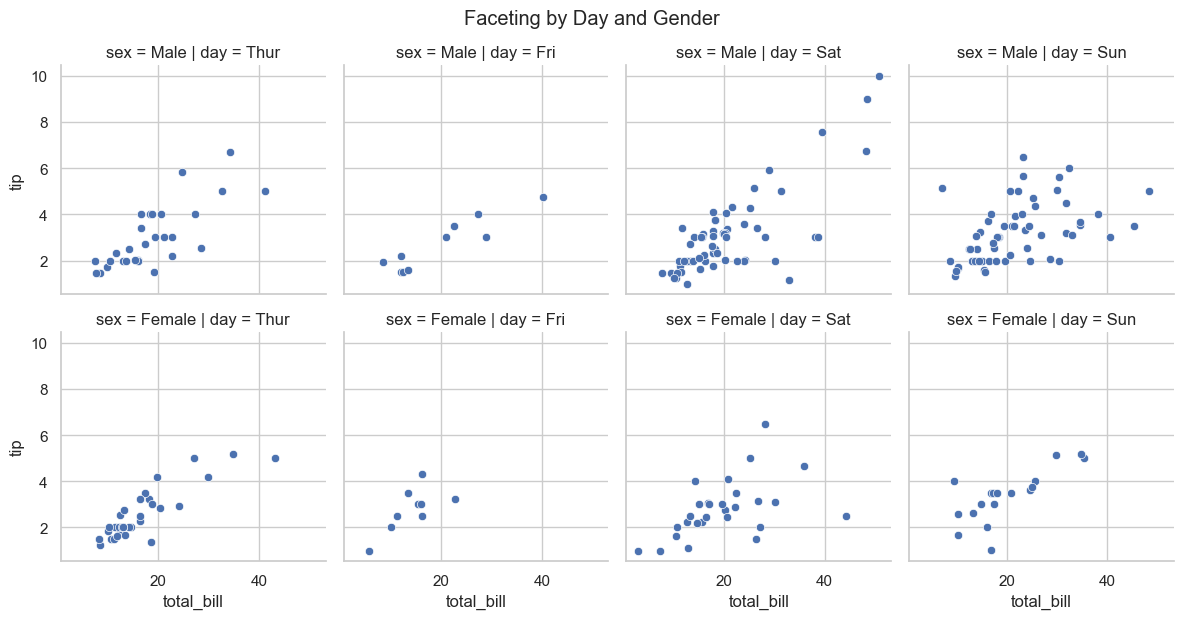

In [25]:
g = sns.FacetGrid(tips, col="day", row="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.fig.suptitle("Faceting by Day and Gender", y=1.03)
plt.show()

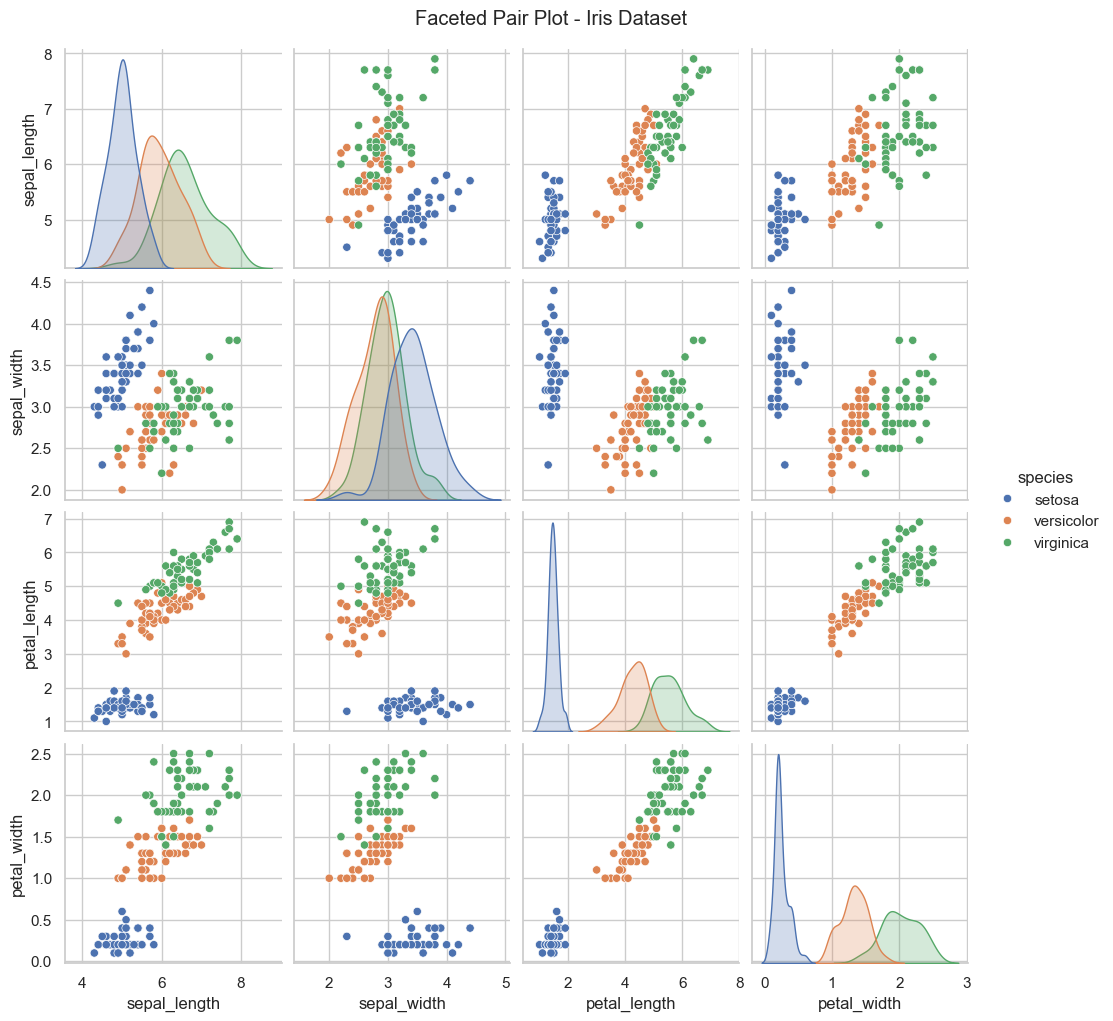

In [26]:
# Pair plot (Iris)
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
plt.suptitle("Faceted Pair Plot - Iris Dataset", y=1.02)
plt.show()

### Animation & Interaction 

# Part 3: Examples in Practice

## Setup

In [27]:
# Parameters for the normal distributions
mean1 = 1
std_dev1 = 1
num_samples1 = 1000

mean2 = 2
std_dev2 = 3
num_samples2 = 1000

# Generate the datasets
data1 = np.random.normal(mean1, std_dev1, num_samples1)
data2 = np.random.normal(mean2, std_dev2, num_samples2)

# Create DataFrames from the datasets
df1 = pd.DataFrame(data1, columns=['Value'])
df2 = pd.DataFrame(data2, columns=['Value'])

## Evaluate 2 Options

In [28]:
## put the means here and the Pval

## Distributi0ns

In [29]:
import plotly.figure_factory as ff
# Create KDE plot
fig = ff.create_distplot([data1, data2], group_labels=['Distribution 1', 'Distribution 2'], show_hist=False)

# Add vertical lines for means and break-even
fig.add_trace(go.Scatter(x=[mean1, mean1], y=[0, 0.4], mode='lines', name=f'Mean of Distribution 1 ({mean1})', line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=[mean2, mean2], y=[0, 0.4], mode='lines', name=f'Mean of Distribution 2 ({mean2})', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=[0, 0], y=[0, 0.4], mode='lines', name='Break-Even', line=dict(color='black', dash='dash')))

# Customize layout
fig.update_layout(title='KDE Plot of Two Normal Distributions', xaxis_title='Value', yaxis_title='Density')
fig.update_layout(height=800)
# Show plot
fig.show()

# 🙏 Thank You!
Questions?

*Let's connect on LinkedIn or email.*